12 steps to Navier–Stokes
======
***

Step 1: 1-D Linear Convection
-----
***

 The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about CFD. It is surprising that this little equation can teach us so much! Here it is:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With given initial conditions (understood as a *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate $x$ into points that we index from $i=0$ to $N$, and stepping in discrete time intervals of size $\Delta t$.

From the definition of a derivative (and simply removing the limit), we know that:

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

Our discrete equation, then, is:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$.  We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Now let's try implementing this in Python.  


In [80]:
using GLMakie
using ClipData

Now let's define a few variables; we want to define an evenly spaced grid of points within a spatial domain that is 2 units of length wide, i.e., $x_i\in(0,2)$.  We'll define a variable `Nₓ`, which will be the number of grid points we want (including the endpoints) and `Δx` will be the distance between any pair of adjacent grid points.

Therefore $(N-1) \Delta x = L$. Starting from $x=0$, we need $(N-1)$ more steps of size $\Delta x$ to reach $x=L$ for a total of $N$ grid points.

In [37]:
L = 2.
Nₓ = 80
Δx = L / (Nₓ-1)

Δt = 0.025
Nₜ = 25

25

In [38]:
xs = 0:Δx:L
length(xs)

80

In [39]:
function pos2ind(x, Δx)
    return floor(Int, x/Δx) + 1
end

pos2ind (generic function with 1 method)

In [40]:
u0 = ones(length(xs))
for i in pos2ind(0.5, Δx):pos2ind(1.0, Δx)
    u0[i] = 2.
end
u0

80-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

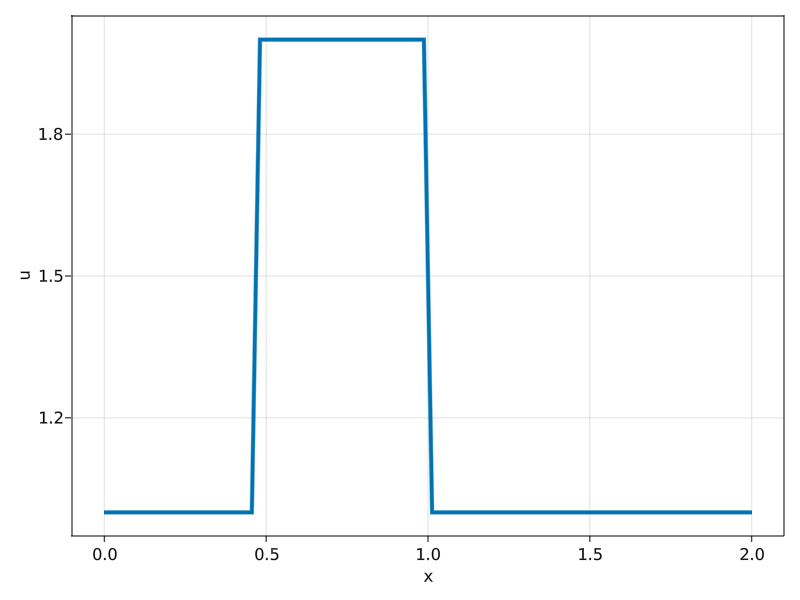

In [41]:
lines(xs, u0, linewidth=4.0, axis=(xlabel="x", ylabel="u"))

In [117]:
function step!(u, p)
    Δt, Δx, c = p
    u_cp = copy(u)
    for i in firstindex(u)+1:lastindex(u)
        u[i] = u_cp[i] - c * Δt / Δx * (u[i] - u_cp[i-1])
    end
end

function sim(;Nₓ = 41, Nₜ = 20, Δt = 0.025)
    
    L = 2.
    Δx = L / (Nₓ-1)
    c=1.0
    xs = 0:Δx:L
    
    u0 = ones(Nₓ)
    for i in pos2ind(0.5, Δx):pos2ind(1.0, Δx)
        u0[i] = 2.
    end
    
    for t ∈ 1:Nₜ
        step!(u0, (Δt, Δx, c))
    end
    
    return (xs, u0)
end

sim (generic function with 1 method)

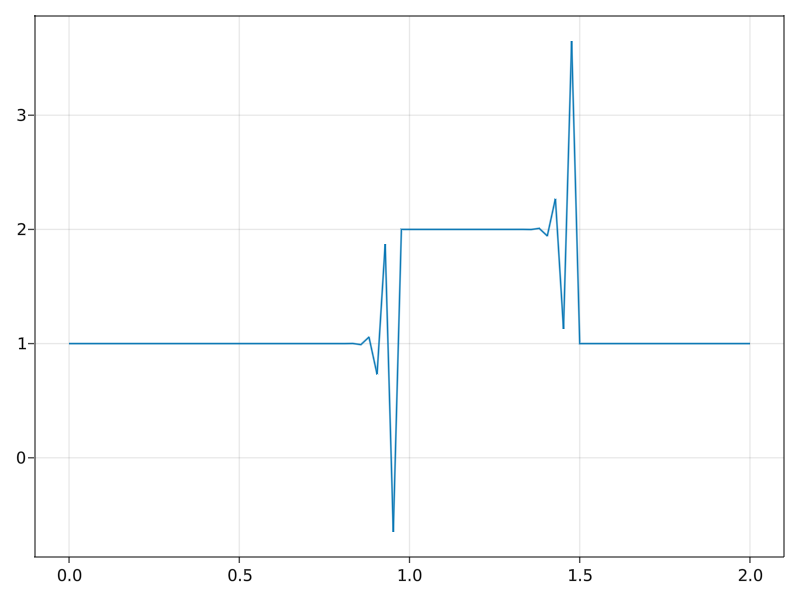

In [128]:
lines(sim(;Nₓ=85)...)

In [137]:
function nonlinearstep!(u, p)
    Δt, Δx = p
    u_cp = copy(u)
    for i in firstindex(u)+1:lastindex(u)
        u[i] = u_cp[i] - u_cp[i] * Δt / Δx * (u_cp[i] - u_cp[i-1])
    end
end

function nonlinearsim(;Nₓ = 41, Nₜ = 20, Δt = 0.025)
    
    L = 2.
    Δx = L / (Nₓ-1)
    c=1.0
    xs = 0:Δx:L
    
    u0 = ones(Nₓ)
    for i in pos2ind(0.5, Δx):pos2ind(1.0, Δx)
        u0[i] = 2.
    end
    
    for t ∈ 1:Nₜ
        nonlinearstep!(u0, (Δt, Δx))
    end
    
    return (xs, u0)
end

nonlinearsim (generic function with 1 method)

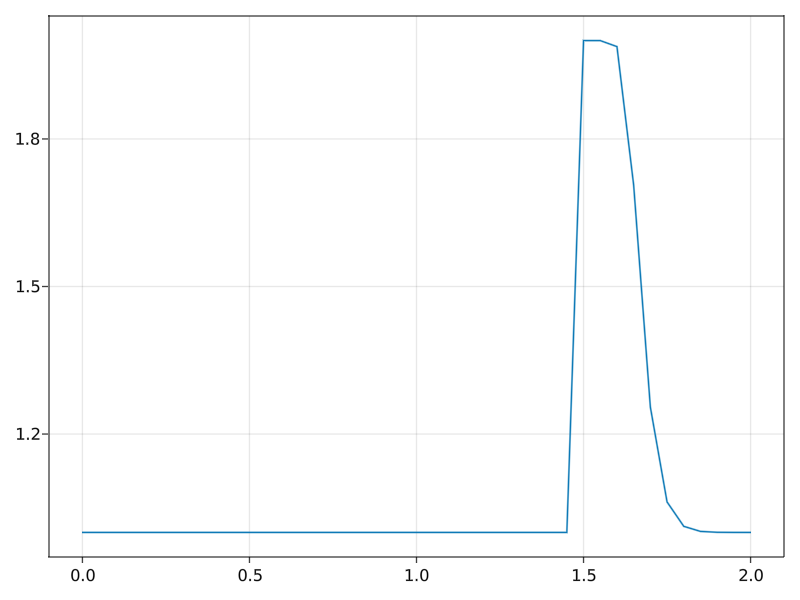

In [138]:
lines(nonlinearsim()...)

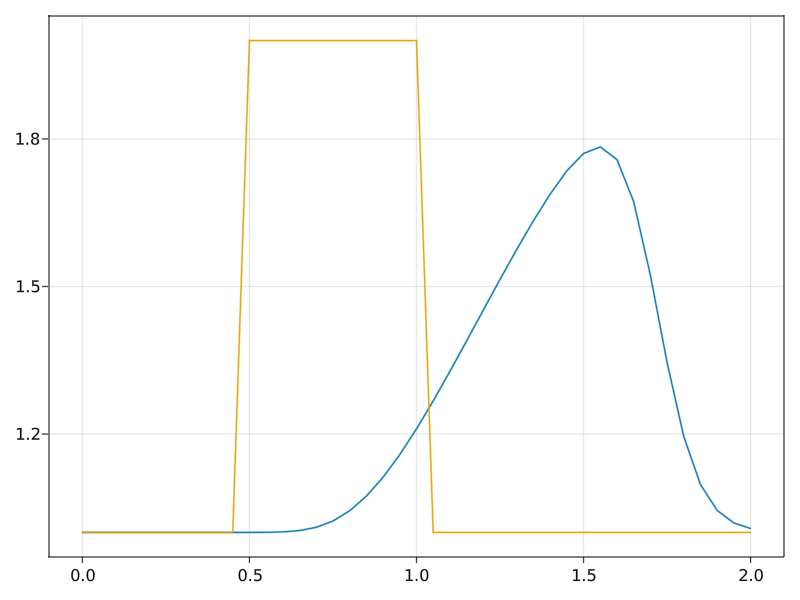

In [143]:
lines(nonlinearsim(Δt=0.0025, Nₜ=200)...)
lines!(xs, u0)
current_figure()

In [82]:
u_py = [1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.00000003, 1.00000077, 1.00000972, 1.00007826, 1.00045526,
       1.00203866, 1.00731665, 1.02164263, 1.05387607, 1.11476147,
       1.21217811, 1.34501895, 1.49999923, 1.6549713 , 1.78774363,
       1.88478327, 1.94408527, 1.97104073, 1.97104073, 1.94408527,
       1.88478327, 1.78774363, 1.6549713 , 1.49999923, 1.34501895,
       1.21217811, 1.11476147, 1.05387607, 1.02164263, 1.00731665,
       1.00203866]

41-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.00000003
 1.00000077
 1.00000972
 ⋮
 1.94408527
 1.88478327
 1.78774363
 1.6549713
 1.49999923
 1.34501895
 1.21217811
 1.11476147
 1.05387607
 1.02164263
 1.00731665
 1.00203866

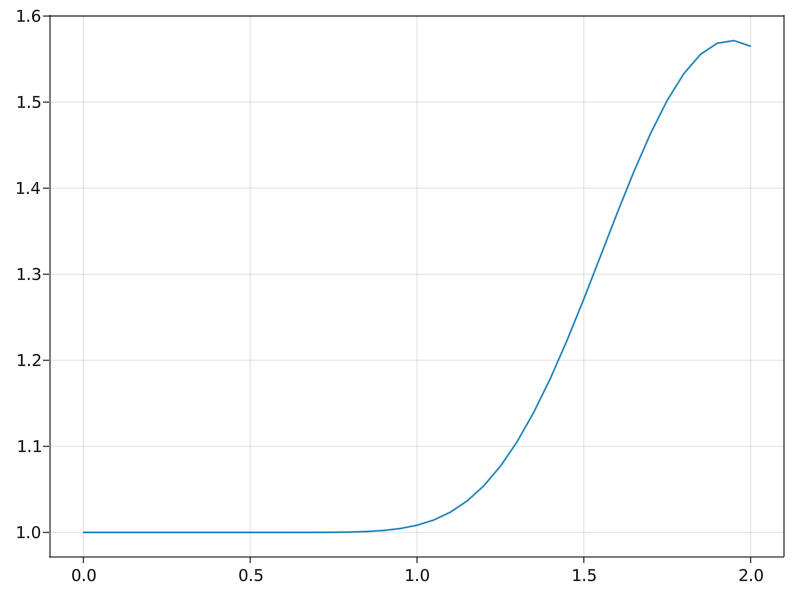

In [115]:
lines(xs, u)